In [205]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder 
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [214]:
df = pd.read_csv('../data/encoded.csv')


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             7043 non-null   int64  
 1   gender                 7043 non-null   object 
 2   SeniorCitizen          7043 non-null   int64  
 3   Partner                7043 non-null   object 
 4   Dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   PhoneService           7043 non-null   object 
 7   MultipleLines          7043 non-null   object 
 8   InternetService        7043 non-null   object 
 9   OnlineSecurity         7043 non-null   object 
 10  OnlineBackup           7043 non-null   object 
 11  DeviceProtection       7043 non-null   object 
 12  TechSupport            7043 non-null   object 
 13  StreamingTV            7043 non-null   object 
 14  StreamingMovies        7043 non-null   object 
 15  Cont

In [208]:
col = df.columns
col

Index(['Unnamed: 0', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Monthly/Total_Charges', 'TotalCharges/tenure', 'Churn',
       'tenure_group'],
      dtype='object')

In [209]:
new_col =['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', "tenure_group"]

In [210]:
encoder = OneHotEncoder(categories='auto', drop="if_binary")
encoder.fit(df[new_col])
encoder.categories_

[array(['Female', 'Male'], dtype=object),
 array([0, 1]),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'No phone service', 'Yes'], dtype=object),
 array(['DSL', 'Fiber optic', 'No'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Bank transfer (automatic)', 'Credit card (automatic)',
        'Electronic check', 'Mailed check'], dtype=object),
 array(['0 - 11', '13 - 24', '26 - 37', '39 - 50', '52 - 63', '65 - 76'],
       dtype=object)]

In [211]:
new_col =['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', "tenure_group"]

# Fit the encoder to the specified columns
encoded_df = pd.get_dummies(df[new_col], columns=new_col)

# Print the encoded DataFrame
encoded_df

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_0 - 11,tenure_group_13 - 24,tenure_group_26 - 37,tenure_group_39 - 50,tenure_group_52 - 63,tenure_group_65 - 76
0,True,False,True,False,False,True,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False
1,False,True,True,False,True,False,True,False,False,True,...,False,False,False,True,False,False,True,False,False,False
2,False,True,True,False,True,False,True,False,False,True,...,False,False,False,True,True,False,False,False,False,False
3,False,True,True,False,True,False,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,True,False,True,False,True,False,True,False,False,True,...,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,True,True,False,False,True,False,True,False,True,...,False,False,False,True,False,True,False,False,False,False
7039,True,False,True,False,False,True,False,True,False,True,...,False,True,False,False,False,False,False,False,False,True
7040,True,False,True,False,False,True,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
7041,False,True,False,True,False,True,True,False,False,True,...,False,False,False,True,True,False,False,False,False,False


In [212]:
new_df = pd.concat([encoded_df, df], axis=1)
new_df = new_df.drop(columns = new_col)
for i in new_df.columns[:-5]:
    # print(new_df[i] == True)
    new_df[i] = np.where(new_df[i] == True, 1, 0)
new_df
new_df.drop(columns=["Unnamed: 0"], inplace=True)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender_Female                            7043 non-null   int32  
 1   gender_Male                              7043 non-null   int32  
 2   SeniorCitizen_0                          7043 non-null   int32  
 3   SeniorCitizen_1                          7043 non-null   int32  
 4   Partner_No                               7043 non-null   int32  
 5   Partner_Yes                              7043 non-null   int32  
 6   Dependents_No                            7043 non-null   int32  
 7   Dependents_Yes                           7043 non-null   int32  
 8   PhoneService_No                          7043 non-null   int32  
 9   PhoneService_Yes                         7043 non-null   int32  
 10  MultipleLines_No                         7043 no

In [ ]:
new_df['TotalCharges'] = new_df['TotalCharges'].replace(' ', 0)
new_df['TotalCharges'].value_counts()

TotalCharges
0.00       11
20.20      11
19.75       9
20.05       8
19.90       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: count, Length: 6531, dtype: int64

In [ ]:
new_df['Churn'] = np.where(new_df['Churn'] == 'Yes', 1, 0)

In [ ]:
data = new_df.iloc[:, :-1]
labels = new_df.iloc[:, -1]

In [ ]:
def PCA_n(data, labels, num_components, Normalize = True):
    # Separate features and labels
    X = data
    y = labels

    # Standardize the data (important for PCA)
    if Normalize:
        X_standardized = StandardScaler().fit_transform(X)
    else:
        X_standardized = X

    # Apply PCA
    # num_components = 3  # You can choose the number of components based on your requirement
    pca = PCA(n_components=num_components)
    principal_components = pca.fit_transform(X_standardized)

    # Create a DataFrame with the principal components and labels
    columns = [f'PC{i}' for i in range(1,num_components+1)]

    
    principal_df = pd.DataFrame(data=principal_components, columns=columns)
    final_df = pd.concat([principal_df, y], axis=1)
    return final_df
    # print(final_df3)

In [ ]:
pca_2 = PCA_n(data, labels, 2)
pca_2

,PC1,PC2,Churn
0,-0.446722,5.085562,0
1,-0.438086,0.722835,0
2,-0.468601,2.953096,1
3,-0.385092,-0.026733,0
4,-1.531291,4.165082,1
...,...,...,...
7038,-1.733179,-2.570403,0
7039,-3.178064,-3.907209,0
7040,-0.487229,3.404722,0
7041,-1.766788,3.058344,1


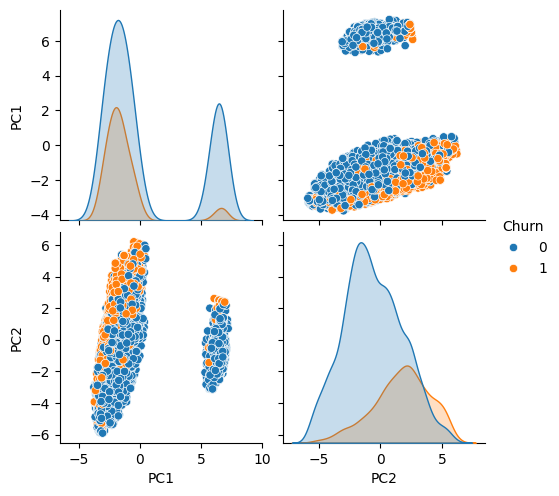

In [ ]:
sns.pairplot(pca_2, hue = 'Churn')

In [ ]:
pca_3 = PCA_n(data, labels, 3)
pca_3

,PC1,PC2,PC3,Churn
0,-0.446722,5.085559,3.600741,0
1,-0.438086,0.722824,2.268967,0
2,-0.468601,2.953095,1.573323,1
3,-0.385093,-0.026733,6.032554,0
4,-1.531291,4.165084,-1.428436,1
...,...,...,...,...
7038,-1.733179,-2.570404,1.215274,0
7039,-3.178064,-3.907205,-1.568806,0
7040,-0.487229,3.404718,4.629506,0
7041,-1.766788,3.058343,-1.389962,1


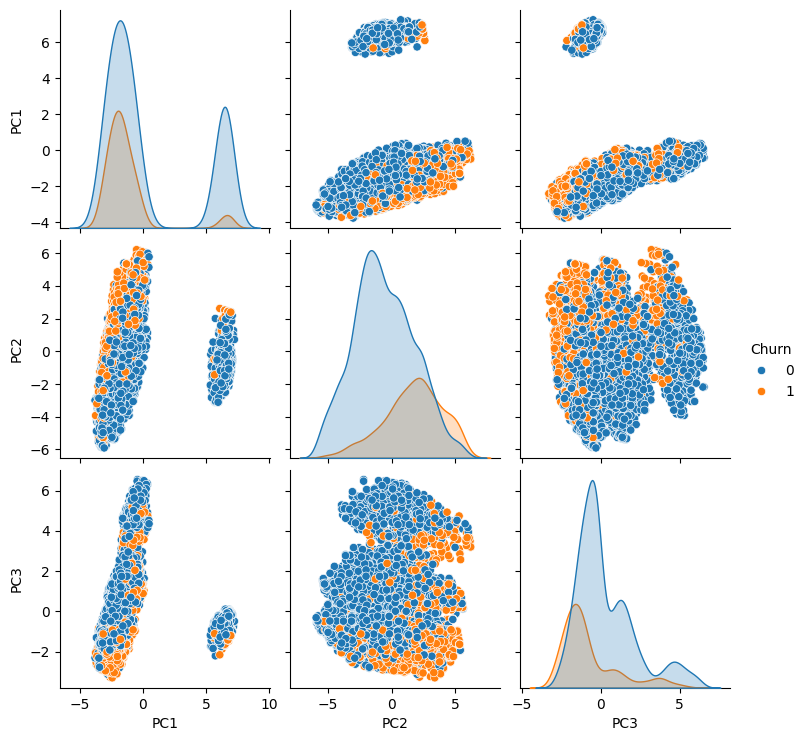

In [ ]:
sns.pairplot(pca_3, hue = 'Churn')

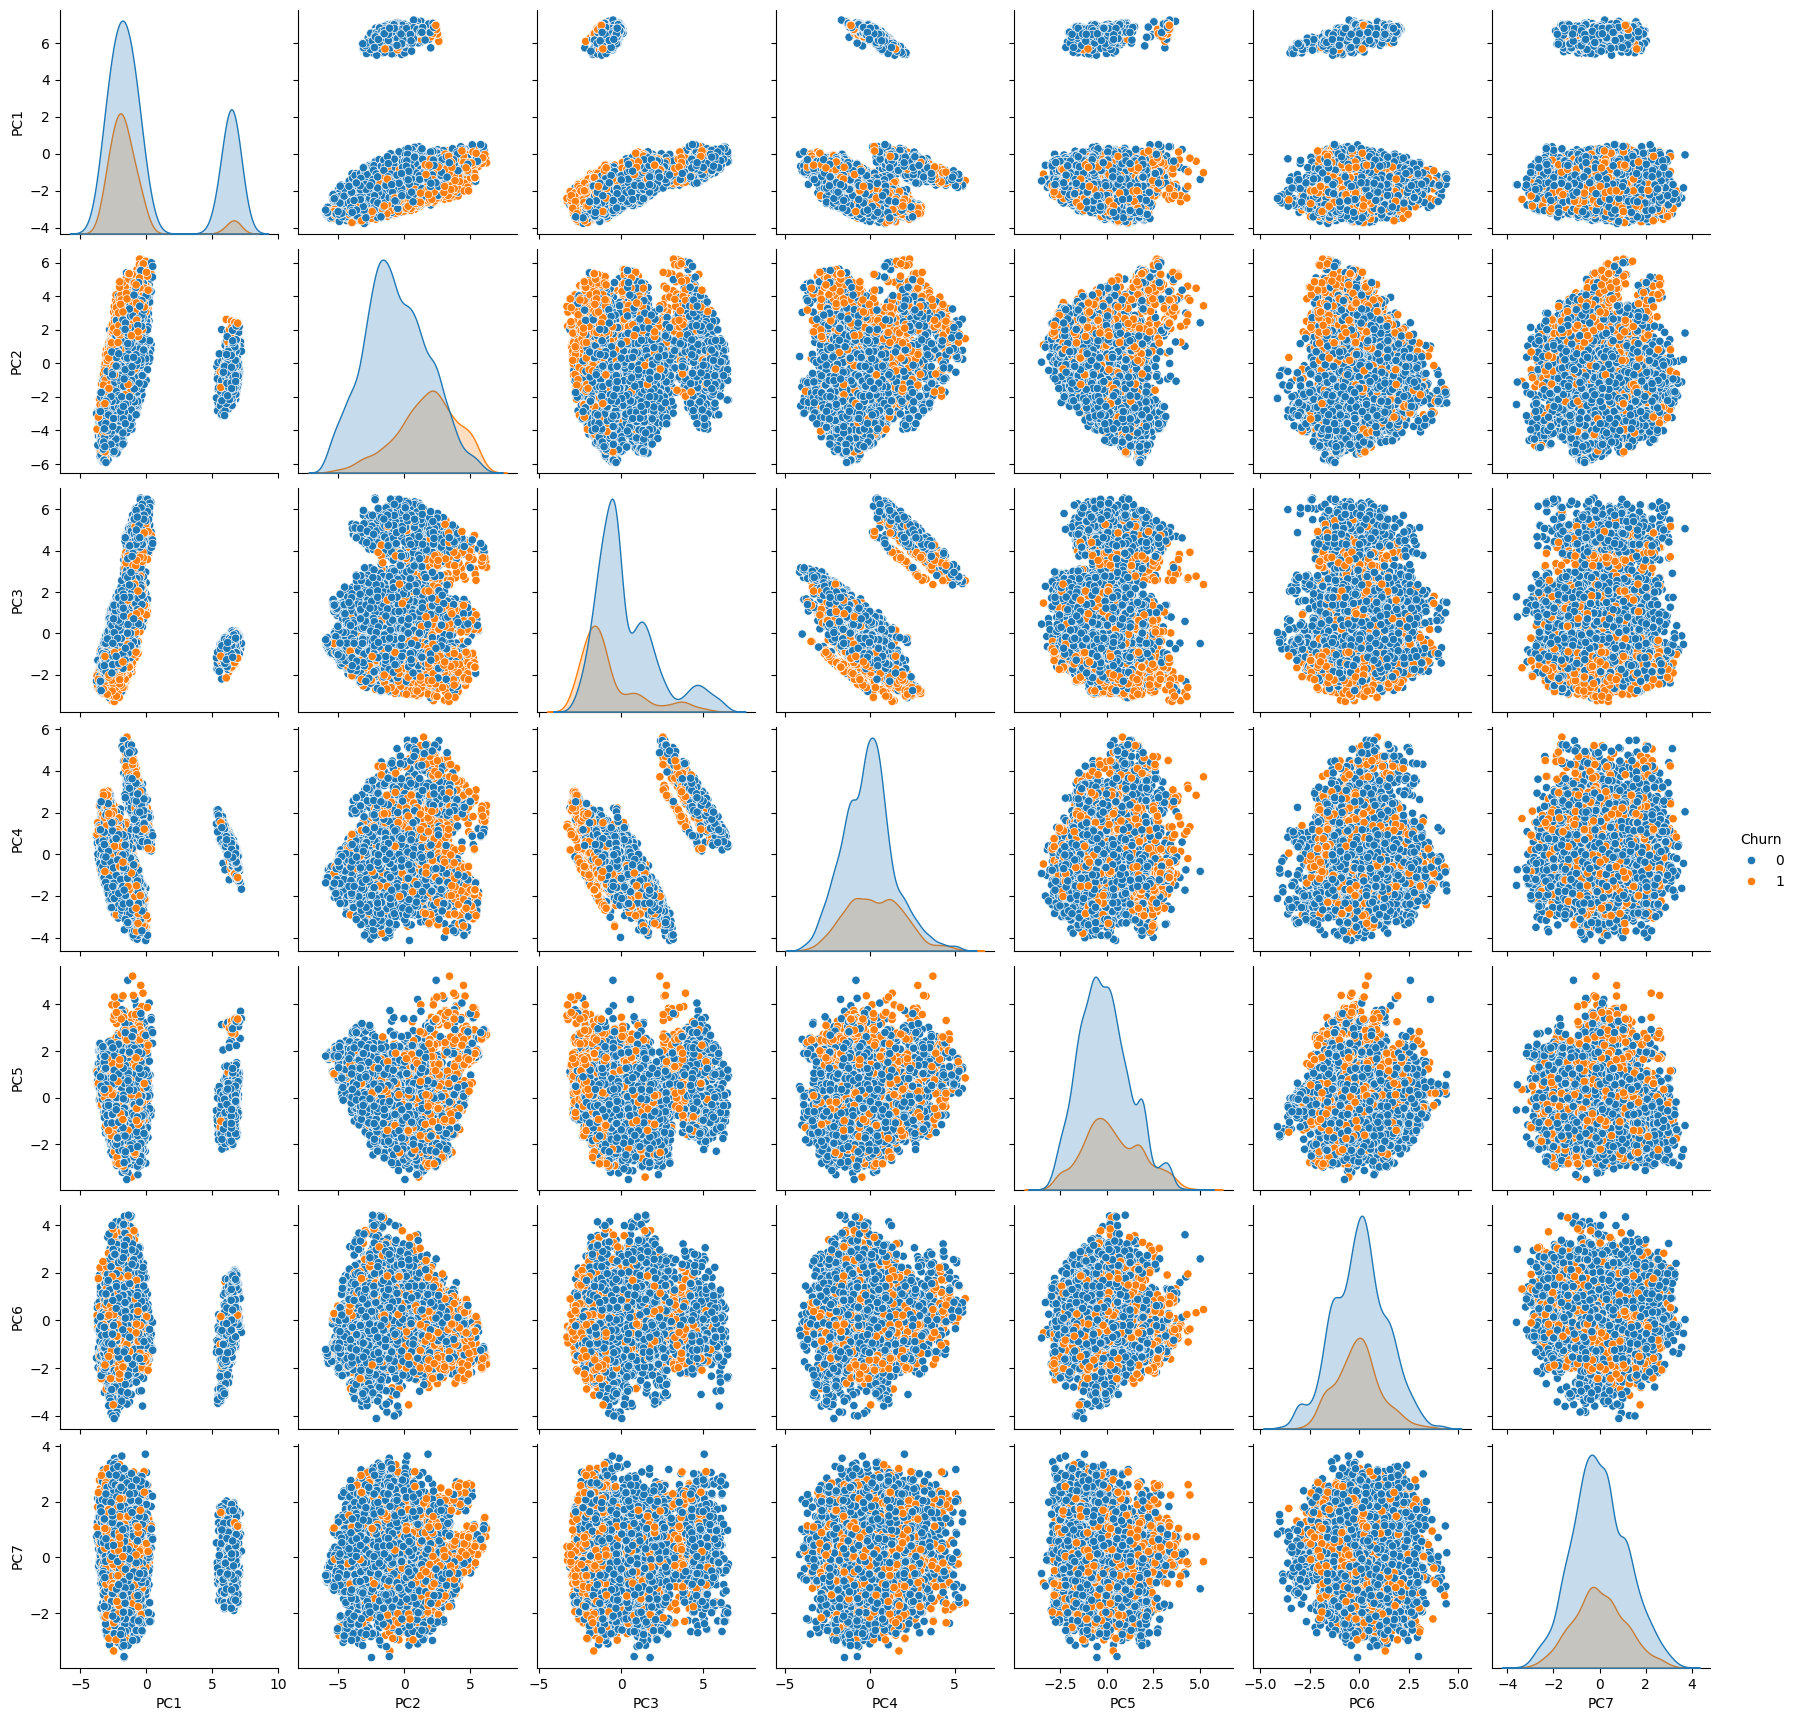

In [ ]:
pca_7 = PCA_n(data, labels, 7)
sns.pairplot(pca_7, hue = 'Churn')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from tqdm import tqdm


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D  # For 3D visualization if needed

# Load your dataset
data_cluster = pca_7.copy()

# Assuming your features are in columns 'feature1', 'feature2', 'feature3'
features = data_cluster

# Standardize the data
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Choose the number of clusters (k)
k = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
data_cluster['cluster'] = kmeans.fit_predict(features_standardized)

/home/edgar/dev/beir/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
data_cluster

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,Churn,cluster
0,-0.446689,5.085595,3.596011,1.790615,2.671027,-2.186134,2.381350,0,0
1,-0.438074,0.722678,2.269914,-2.136316,-1.854955,2.373180,0.349664,0,0
2,-0.468612,2.952402,1.575369,-2.840561,-0.024403,-0.354917,1.836282,1,2
3,-0.385063,-0.026861,6.031138,1.435140,-0.610746,1.127081,0.559000,0,0
4,-1.531307,4.166154,-1.427667,-0.933582,-0.300383,-0.116224,-0.220754,1,2
...,...,...,...,...,...,...,...,...,...
7038,-1.733160,-2.572080,1.215126,-0.640873,-0.046332,2.627210,-1.971306,0,0
7039,-3.178080,-3.906765,-1.567069,0.466496,0.356956,-0.292051,1.379679,0,0
7040,-0.487226,3.404476,4.630112,2.019439,-0.186810,-1.603982,-0.583636,0,0
7041,-1.766847,3.058146,-1.385303,-0.383210,-0.932394,-1.956442,0.025416,1,2


In [ ]:
data

,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,...,tenure_group_26 - 37,tenure_group_39 - 50,tenure_group_52 - 63,tenure_group_65 - 76,tenure,MonthlyCharges,TotalCharges,Monthly/Total_Charges,TotalCharges/tenure,cluster
0,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,1,29.85,29.85,1.000000,29.850000,2
1,1,0,0,0,1,1,0,0,1,0,...,1,0,0,0,0,56.95,1889.50,0.030140,55.573529,2
2,1,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,53.85,108.15,0.497920,54.075000,2
3,1,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,42.30,1840.75,0.022980,40.905556,2
4,0,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,70.70,151.65,0.466205,75.825000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,0,0,1,1,0,...,0,0,0,0,0,84.80,1990.50,0.042602,82.937500,0
7039,0,0,1,1,1,0,0,1,0,1,...,0,0,0,1,0,103.20,7362.90,0.014016,102.262500,0
7040,0,0,1,1,0,0,1,0,1,0,...,0,0,0,0,0,29.60,346.45,0.085438,31.495455,2
7041,1,1,1,0,1,0,0,1,0,1,...,0,0,0,0,0,74.40,306.60,0.242661,76.650000,2


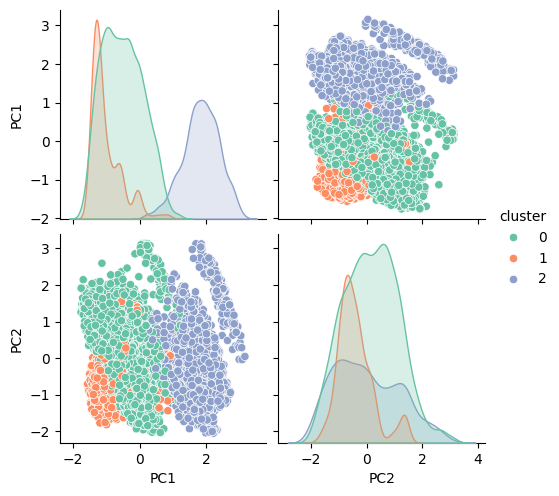

In [ ]:
pca_cluster = PCA_n(data.iloc[:,:a-1], data_cluster.iloc[:,-1], 2)
sns.pairplot(pca_cluster, hue = 'cluster',palette="Set2")

In [ ]:
pca_cluster['cluster']

0       2
1       2
2       2
3       2
4       2
       ..
7038    0
7039    0
7040    2
7041    2
7042    0
Name: cluster, Length: 7043, dtype: int32

In [ ]:
pca_cluster['Churn'] = np.where(((pca_cluster['cluster'] == 2) | (pca_cluster['cluster'] == 3)), 1, 0)


In [ ]:
f1_score(labels,pca_cluster['Churn'])

0.5577610162763001